<a href="https://colab.research.google.com/github/MEENU1305/Diabetes-prediction-using-data-preprocessing-and-AI/blob/main/DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes prediction Model Code

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
# Adjustment of visibility of Datafreames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.600,0.127,47,1
1,0,84,82,31,125,38.200,0.233,23,0
2,0,145,0,0,0,44.200,0.630,31,1
3,0,135,68,42,250,42.300,0.365,24,1
4,1,139,62,41,480,40.700,0.536,21,0


In [ ]:
print("**************** Shape ******")
print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### NA #####################")
print(df.isnull().sum())
print("##################### Quantiles #####################")
print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

**************** Shape ******
(2000, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Quantiles #####################
                          0.000  0.050   0.500   0.950   0.990   1.000
Pregnancies               0.000  0.000   3.000  10.000  13.000  17.000
Glucose                   0.000 80.000 117.000

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.000,3.704,3.306,0.000,1.000,3.000,6.000,17.000
Glucose,2000.000,121.183,32.069,0.000,99.000,117.000,141.000,199.000
BloodPressure,2000.000,69.145,19.188,0.000,63.500,72.000,80.000,122.000
SkinThickness,2000.000,20.935,16.103,0.000,0.000,23.000,32.000,110.000
Insulin,2000.000,80.254,111.181,0.000,0.000,40.000,130.000,744.000
BMI,2000.000,32.193,8.150,0.000,27.375,32.300,36.800,80.600
DiabetesPedigreeFunction,2000.000,0.471,0.324,0.078,0.244,0.376,0.624,2.420
Age,2000.000,33.090,11.786,21.000,24.000,29.000,40.000,81.000
Outcome,2000.000,0.342,0.474,0.000,0.000,0.000,1.000,1.000


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,1316
1,684


In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.169,110.587,68.095,20.052,70.564,30.567,0.435,31.081
1,4.732,141.569,71.167,22.633,98.898,35.320,0.541,36.956


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # report
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')  # the number of categorical variables

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # report
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')  # the number of categorical variables
    print(f'num_cols: {len(num_cols)}')  # the number of numerical variables
    print(f'cat_but_car: {len(cat_but_car)}')  # the number of cardinal variables
    print(f'num_but_cat: {len(num_but_cat)}')  # the number of categorical variables that looks numerical
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2000
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
print("Categorical columns:",cat_cols)
print("Numerical columns:", num_cols)
print("Cardinal columns:", cat_but_car)

Categorical columns: ['Outcome']
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Cardinal columns: []


In [ ]:
# Target variable analysis
# The average of the numerical variables according to the target variable
df.groupby(cat_cols)[num_cols].mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.169,110.587,68.095,20.052,70.564,30.567,0.435,31.081
1,4.732,141.569,71.167,22.633,98.898,35.320,0.541,36.956


In [ ]:
# The average of the target variable according to the categorical variables
df[cat_cols].mean()

,0
Outcome,0.342


In [ ]:
print(df.Outcome.value_counts())
print("-------------------------------")
print(df[cat_cols].mean())
print("-------------------------------")
print("Ratio: ")
(df.Outcome.value_counts() / len(df)) *100

Outcome
0    1316
1     684
Name: count, dtype: int64
-------------------------------
Outcome   0.342
dtype: float64
-------------------------------
Ratio: 


,count
Outcome,
0,65.800
1,34.200


 Analyse outliers and missing values¶

There are 2 points that call attention to the first look:

"Insulin" has a high standard deviation, the quartile values are large, and the outlier is clear.

"SkinThickness" quartile distribution is uneven

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.000,3.704,3.306,0.000,1.000,3.000,6.000,17.000
Glucose,2000.000,121.183,32.069,0.000,99.000,117.000,141.000,199.000
BloodPressure,2000.000,69.145,19.188,0.000,63.500,72.000,80.000,122.000
SkinThickness,2000.000,20.935,16.103,0.000,0.000,23.000,32.000,110.000
Insulin,2000.000,80.254,111.181,0.000,0.000,40.000,130.000,744.000
BMI,2000.000,32.193,8.150,0.000,27.375,32.300,36.800,80.600
DiabetesPedigreeFunction,2000.000,0.471,0.324,0.078,0.244,0.376,0.624,2.420
Age,2000.000,33.090,11.786,21.000,24.000,29.000,40.000,81.000
Outcome,2000.000,0.342,0.474,0.000,0.000,0.000,1.000,1.000


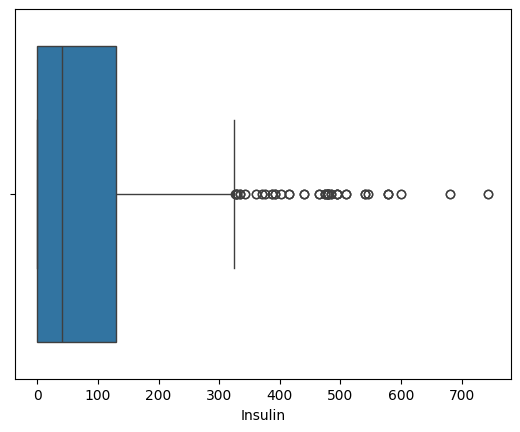

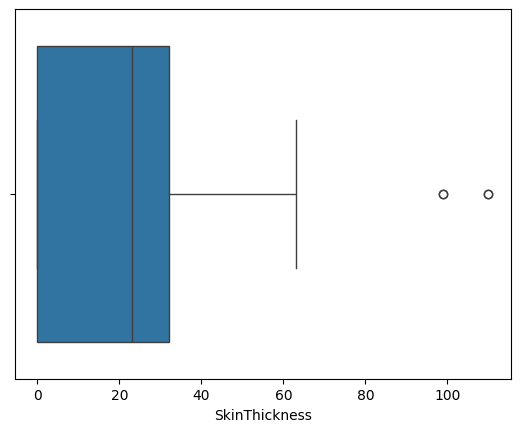

In [ ]:
# Boxplot
sns.boxplot(x=df["Insulin"])
plt.show()

sns.boxplot(x=df["SkinThickness"])
plt.show()

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
for i in df.columns:
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(df,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (36.00, 204.00)
Thresholds of BloodPressure : (38.75, 104.75)
Thresholds of SkinThickness : (-48.00, 80.00)
Thresholds of Insulin : (-195.00, 325.00)
Thresholds of BMI : (13.24, 50.94)
Thresholds of DiabetesPedigreeFunction : (-0.33, 1.19)
Thresholds of Age : (0.00, 64.00)
Thresholds of Outcome : (-1.50, 2.50)


In [ ]:
# Observe the outliers, it can be functioned as well, but we don't need here
low, up = outlier_thresholds(df, "Pregnancies")
df[((df["Pregnancies"] < low) | (df["Pregnancies"] > up))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.100,0.153,43,1
159,17,163,72,41,114,40.900,0.817,47,1
298,14,100,78,25,184,36.600,0.412,46,1
455,14,175,62,30,0,33.600,0.212,38,1
768,14,100,78,25,184,36.600,0.412,46,1
925,14,175,62,30,0,33.600,0.212,38,1
1225,14,100,78,25,184,36.600,0.412,46,1
1317,17,163,72,41,114,40.900,0.817,47,1
1456,14,100,78,25,184,36.600,0.412,46,1
1514,14,175,62,30,0,33.600,0.212,38,1


Missing Values

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.600,0.127,47,1
1,0,84,82,31,125,38.200,0.233,23,0
2,0,145,0,0,0,44.200,0.630,31,1
3,0,135,68,42,250,42.300,0.365,24,1
4,1,139,62,41,480,40.700,0.536,21,0
5,0,173,78,32,265,46.500,1.159,58,0
6,4,99,72,17,0,25.600,0.294,28,0
7,8,194,80,0,0,26.100,0.551,67,0
8,2,83,65,28,66,36.800,0.629,24,0
9,2,89,90,30,0,33.500,0.292,42,0


In [ ]:
num_cols_miss = [i for i in num_cols if i != "Pregnancies"]
for i in num_cols_miss:
    df[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1)

In [ ]:
# df after adding NaN
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000,62.000,35.000,NaN,33.600,0.127,47.000,1
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0
2,0,145.000,NaN,NaN,NaN,44.200,0.630,31.000,1
3,0,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1
4,1,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0
5,0,173.000,78.000,32.000,265.000,46.500,1.159,58.000,0
6,4,99.000,72.000,17.000,NaN,25.600,0.294,28.000,0
7,8,194.000,80.000,NaN,NaN,26.100,0.551,67.000,0
8,2,83.000,65.000,28.000,66.000,36.800,0.629,24.000,0
9,2,89.000,90.000,30.000,NaN,33.500,0.292,42.000,0


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,13
BloodPressure,90
SkinThickness,573
Insulin,956
BMI,28
DiabetesPedigreeFunction,0
Age,0
Outcome,0


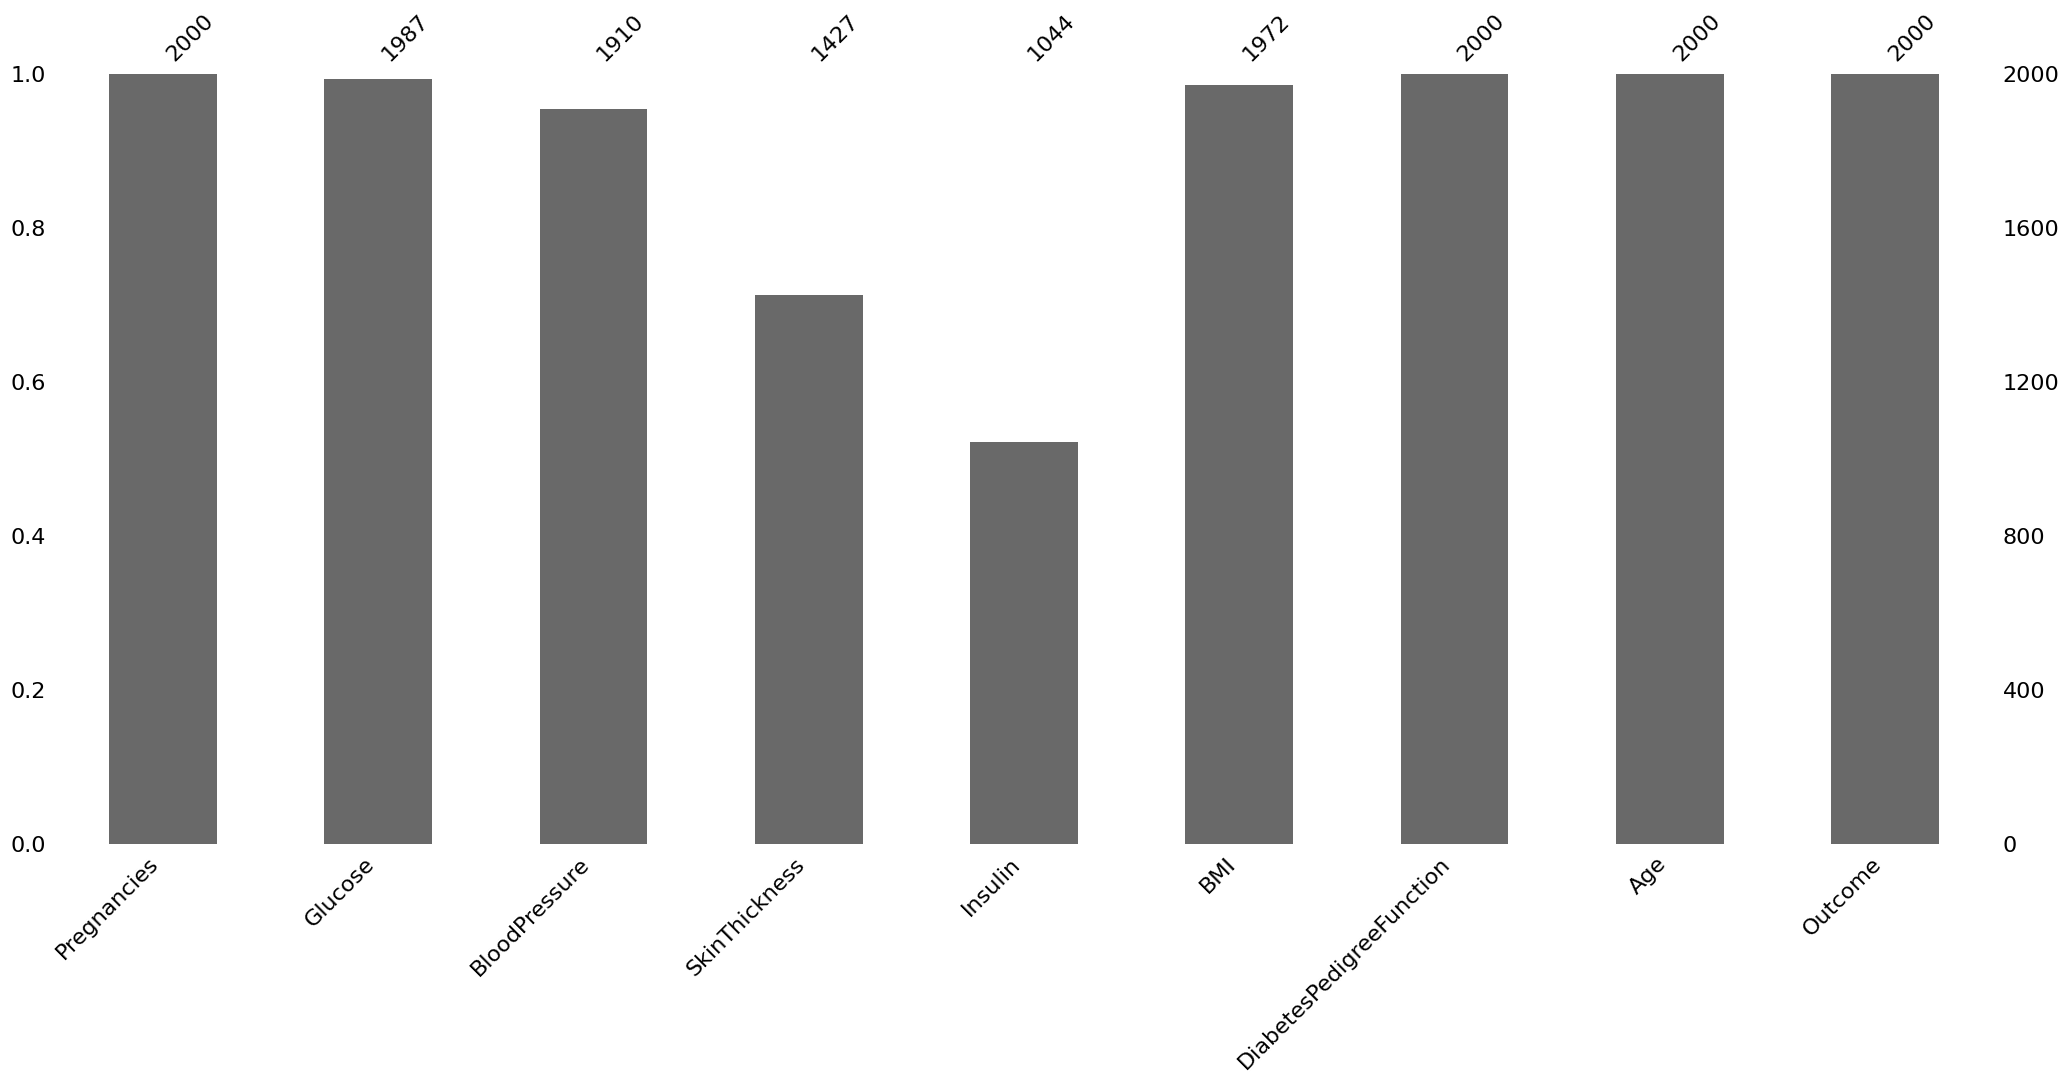

In [ ]:
# the number of non-missing data
msno.bar(df)
plt.show()

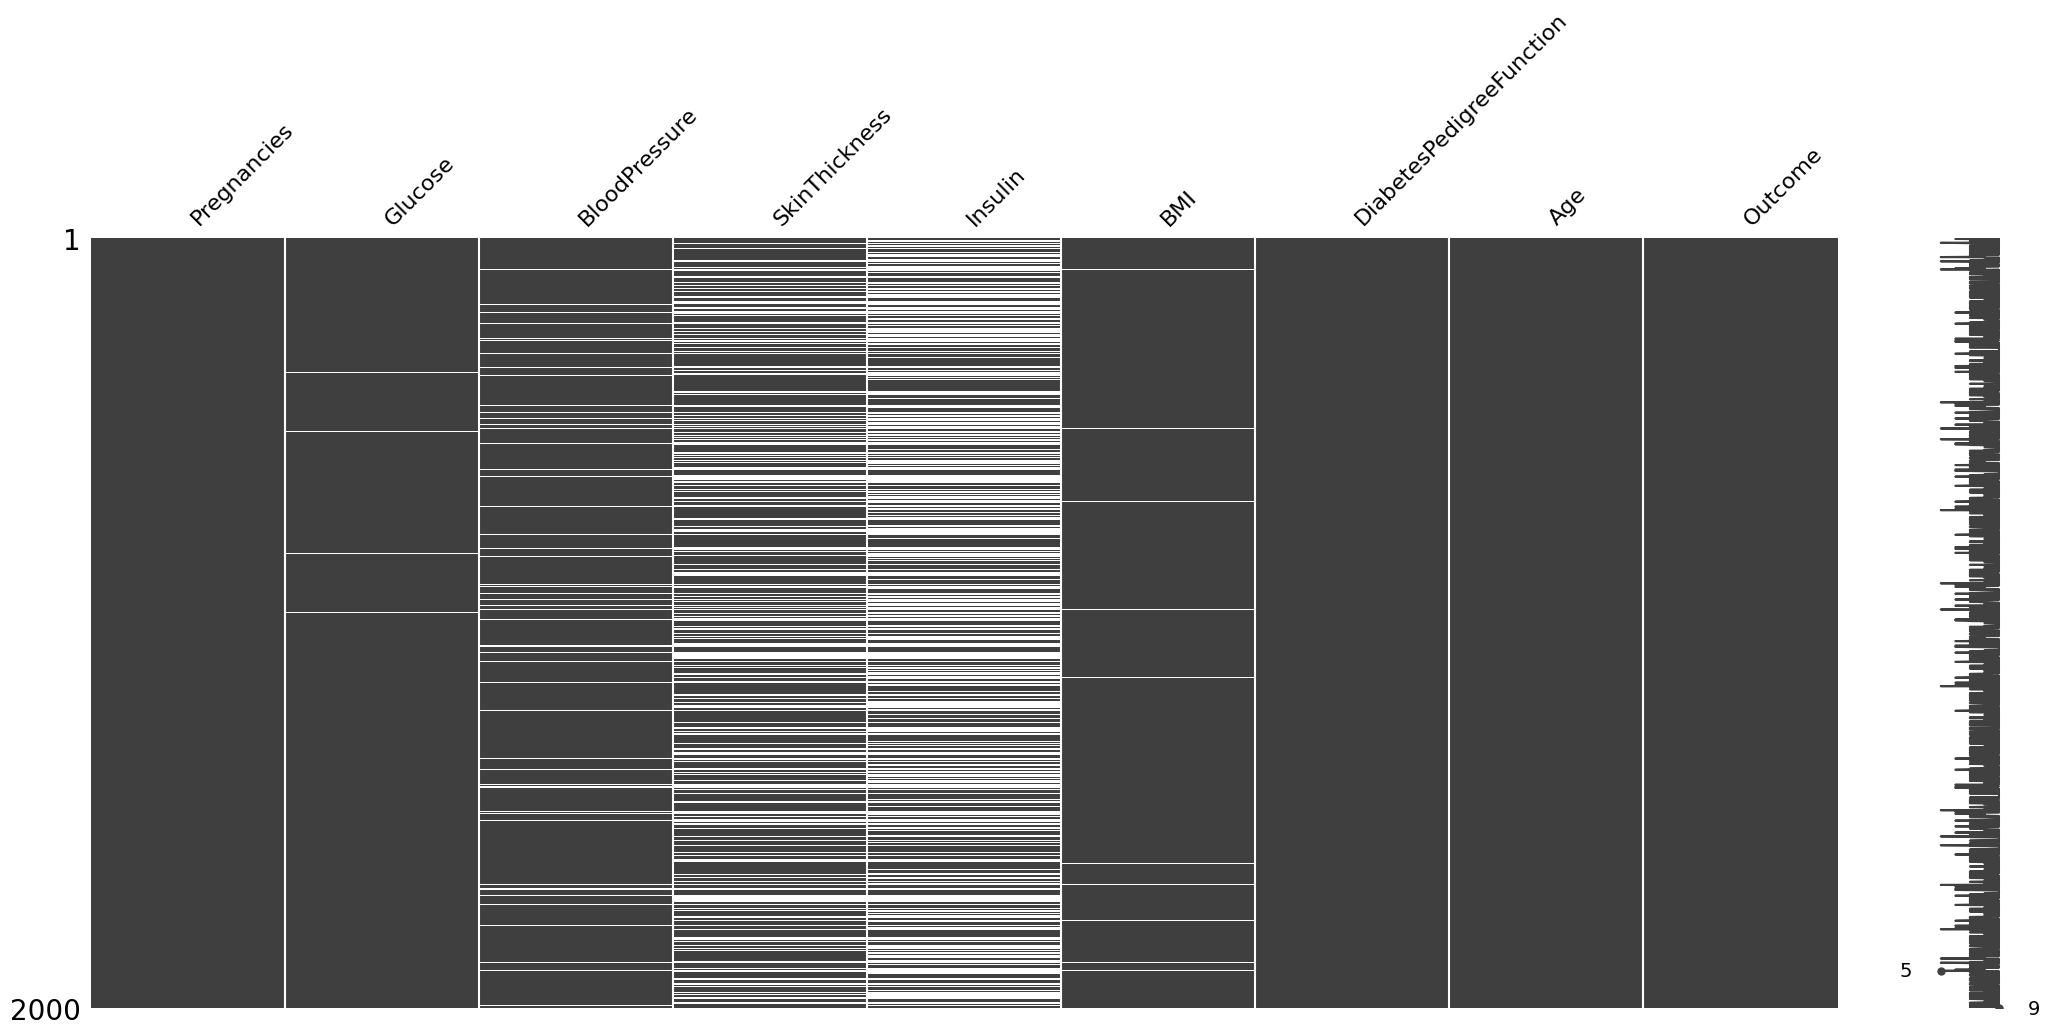

In [ ]:

msno.matrix(df)
plt.show()

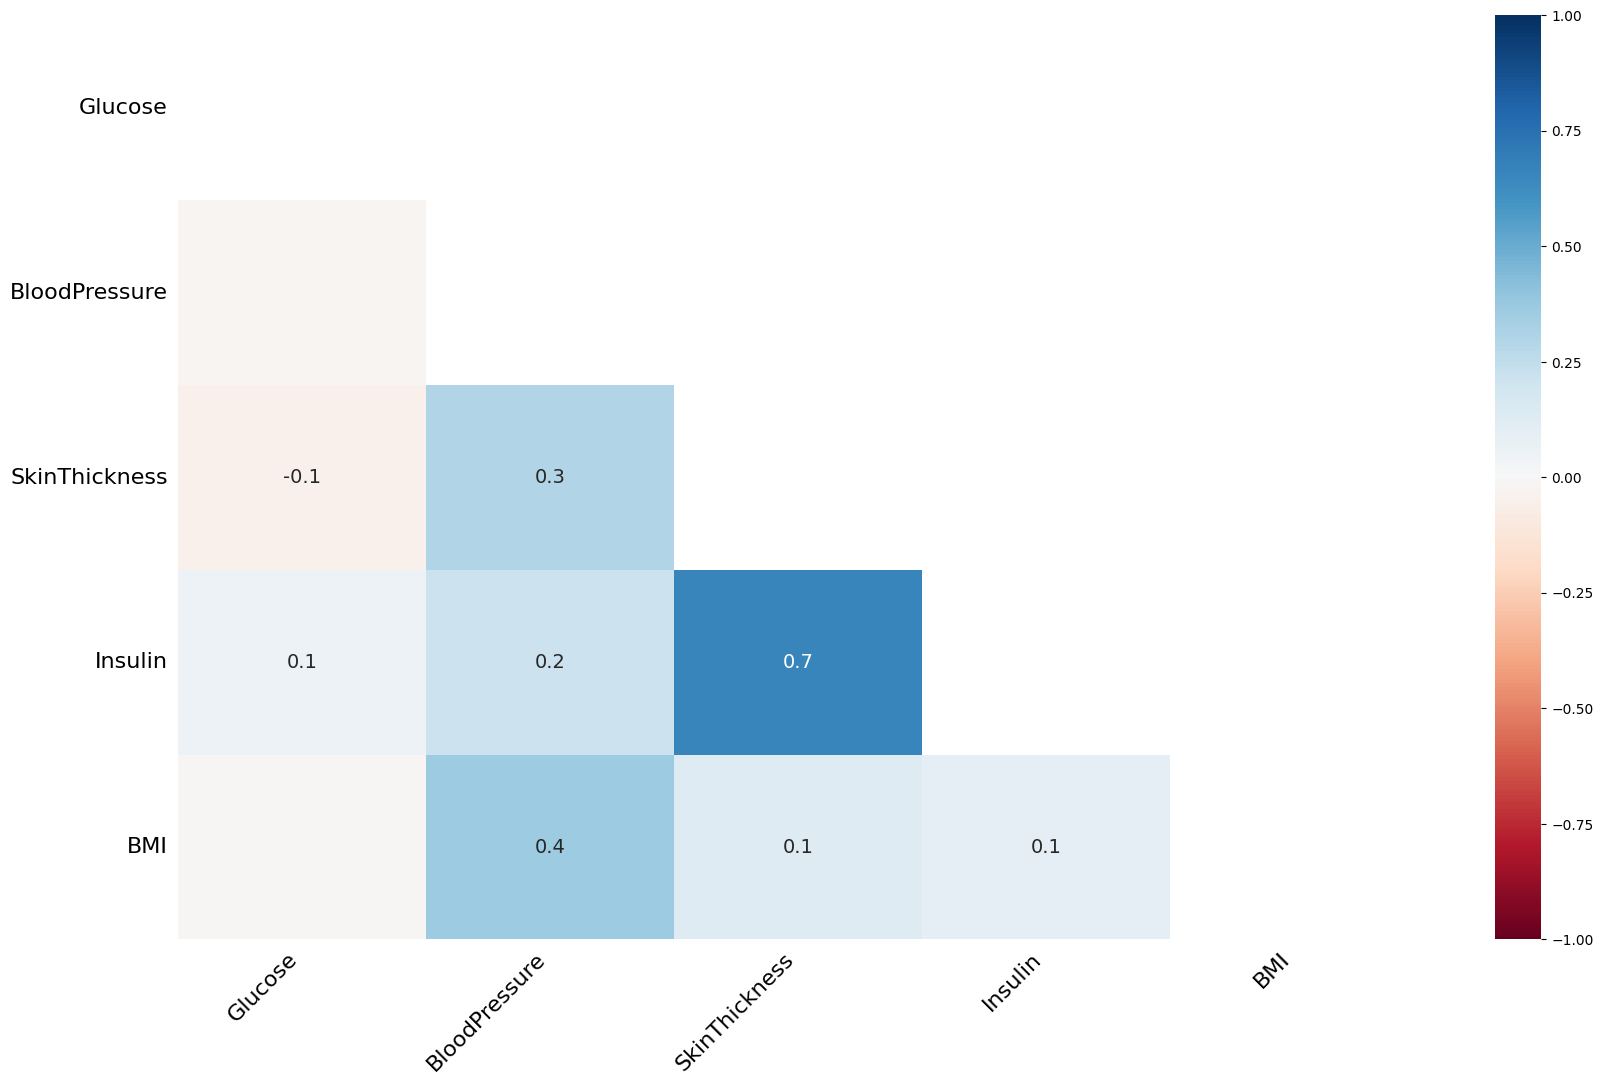

In [ ]:
"""
heatmap can be used rather than try to observe with eyes on matrix map
this heatmap shows the correlation of missing values on variables
"""
msno.heatmap(df)
plt.show()

In [ ]:
def missing_values_table(dataframe, na_name=False):
    # only take missing columns
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)  # number of missing value
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # ratio
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])  # make table
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [ ]:
missing_values_table(df)

               n_miss  ratio
Insulin           956 47.800
SkinThickness     573 28.650
BloodPressure      90  4.500
BMI                28  1.400
Glucose            13  0.650


In [ ]:
# if column names wants to be stored, na_name argument can be made True
na_cols = missing_values_table(df, na_name=True)
na_cols

               n_miss  ratio
Insulin           956 47.800
SkinThickness     573 28.650
BloodPressure      90  4.500
BMI                28  1.400
Glucose            13  0.650


['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
# We created na_cols above, it can be taken with similar way in function:
# na_columns = [i for i in df.columns if df[i].isnull().sum() > 0]
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)  # eksiklik varsa 1, yoksa 0 yaz

    # [tüm satırları getir, sütunlarda içinde NA olanları getir]
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Outcome", na_cols)


                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.341   1987
1                      0.462     13


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.338   1910
1                            0.433     90


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.327   1427
1                            0.379    573


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.323   1044
1                      0.363    956


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.345   1972
1                  0.107     28




relation between target variable(Outcome) and another variables

In [ ]:
# We created na_cols above, it can be taken with similar way in function:
# na_columns = [i for i in df.columns if df[i].isnull().sum() > 0]
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)  # eksiklik varsa 1, yoksa 0 yaz

    # [tüm satırları getir, sütunlarda içinde NA olanları getir]
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Outcome", na_cols)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.341   1987
1                      0.462     13


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.338   1910
1                            0.433     90


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.327   1427
1                            0.379    573


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.323   1044
1                      0.363    956


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.345   1972
1                  0.107     28




In [ ]:
df_cor = pd.DataFrame([df["Outcome"].corr(df[i]) for i in num_cols], index=num_cols, columns=["Correlation"])
df_cor

,Correlation
Pregnancies,0.224
Glucose,0.490
BloodPressure,0.179
SkinThickness,0.246
Insulin,0.292
BMI,0.284
DiabetesPedigreeFunction,0.155
Age,0.237


In [ ]:
df_new = df.copy() # copy dataset to see effect without damage the main dataset
df_new.shape

(2000, 9)

In [ ]:
df_new.dropna(inplace=True)
df_new.shape

(1035, 9)

In [ ]:
df_fill = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_fill.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0
2,0,145.000,72.000,29.000,126.000,44.200,0.630,31.000,1
3,0,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1
4,1,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0
5,0,173.000,78.000,32.000,265.000,46.500,1.159,58.000,0
6,4,99.000,72.000,17.000,126.000,25.600,0.294,28.000,0
7,8,194.000,80.000,29.000,126.000,26.100,0.551,67.000,0
8,2,83.000,65.000,28.000,66.000,36.800,0.629,24.000,0
9,2,89.000,90.000,30.000,126.000,33.500,0.292,42.000,0


In [ ]:
df_ml = df.copy()

# standardization
scaler = MinMaxScaler()
df_ml = pd.DataFrame(scaler.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.118,0.606,0.388,0.272,NaN,0.247,0.021,0.433,1.000
1,0.000,0.258,0.592,0.233,0.152,0.321,0.066,0.033,0.000
2,0.000,0.652,NaN,NaN,NaN,0.417,0.236,0.167,1.000
3,0.000,0.587,0.449,0.340,0.323,0.386,0.123,0.050,1.000
4,0.059,0.613,0.388,0.330,0.638,0.361,0.196,0.000,0.000


In [ ]:
# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_ml = pd.DataFrame(imputer.fit_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.118,0.606,0.388,0.272,0.265,0.247,0.021,0.433,1.000
1,0.000,0.258,0.592,0.233,0.152,0.321,0.066,0.033,0.000
2,0.000,0.652,0.596,0.272,0.258,0.417,0.236,0.167,1.000
3,0.000,0.587,0.449,0.340,0.323,0.386,0.123,0.050,1.000
4,0.059,0.613,0.388,0.330,0.638,0.361,0.196,0.000,0.000


In [ ]:
df_ml = pd.DataFrame(scaler.inverse_transform(df_ml), columns=df_ml.columns)
df_ml.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.000,138.000,62.000,35.000,207.400,33.600,0.127,47.000,1.000
1,0.000,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0.000
2,0.000,145.000,82.400,35.000,202.000,44.200,0.630,31.000,1.000
3,0.000,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1.000
4,1.000,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0.000


In [ ]:
# our first dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000,62.000,35.000,NaN,33.600,0.127,47.000,1
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0
2,0,145.000,NaN,NaN,NaN,44.200,0.630,31.000,1
3,0,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1
4,1,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0


In [ ]:
missing_values_table(df)

               n_miss  ratio
Insulin           956 47.800
SkinThickness     573 28.650
BloodPressure      90  4.500
BMI                28  1.400
Glucose            13  0.650


In [ ]:
na_cols = missing_values_table(df, na_name=True) # columns that includes missing values
n_miss = df[na_cols].isnull().sum() # number of missing values on variables

# 100 as a threshold, it is open to comment
na_cols_ml = [i for i in n_miss.index if n_miss[i] < 100]
na_cols_med = [i for i in n_miss.index if n_miss[i] > 100]
print("Columns that will be applied ML model:", na_cols_ml)
print("Columns that will be filled with median:", na_cols_med)

               n_miss  ratio
Insulin           956 47.800
SkinThickness     573 28.650
BloodPressure      90  4.500
BMI                28  1.400
Glucose            13  0.650
Columns that will be applied ML model: ['Glucose', 'BloodPressure', 'BMI']
Columns that will be filled with median: ['SkinThickness', 'Insulin']


In [ ]:
# check before process
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000,62.000,35.000,NaN,33.600,0.127,47.000,1
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0
2,0,145.000,NaN,NaN,NaN,44.200,0.630,31.000,1
3,0,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1
4,1,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0
5,0,173.000,78.000,32.000,265.000,46.500,1.159,58.000,0
6,4,99.000,72.000,17.000,NaN,25.600,0.294,28.000,0
7,8,194.000,80.000,NaN,NaN,26.100,0.551,67.000,0
8,2,83.000,65.000,28.000,66.000,36.800,0.629,24.000,0
9,2,89.000,90.000,30.000,NaN,33.500,0.292,42.000,0


In [ ]:
# for the number of missing value is less than 100
df[na_cols_med] = df[na_cols_med].apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1
3,0,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1
4,1,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0
5,0,173.000,78.000,32.000,265.000,46.500,1.159,58.000,0
6,4,99.000,72.000,17.000,126.000,25.600,0.294,28.000,0
7,8,194.000,80.000,29.000,126.000,26.100,0.551,67.000,0
8,2,83.000,65.000,28.000,66.000,36.800,0.629,24.000,0
9,2,89.000,90.000,30.000,126.000,33.500,0.292,42.000,0


, "SkinThickness" and "Insulin" have been filled with their median values and the variables that have slight number of missing values will be filled with ML model

In [ ]:
# standardization
scaler = MinMaxScaler()

# take only needed columns
df[na_cols_ml] = pd.DataFrame(scaler.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

# fill with KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[na_cols_ml] = pd.DataFrame(imputer.fit_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

# from standardized to non-standardized
df[na_cols_ml] = pd.DataFrame(scaler.inverse_transform(df[na_cols_ml]), columns=df[na_cols_ml].columns)
print(df[na_cols_ml].head())

   Glucose  BloodPressure   BMI
0    0.606          0.388 0.247
1    0.258          0.592 0.321
2    0.652          0.598 0.417
3    0.587          0.449 0.386
4    0.613          0.388 0.361
   Glucose  BloodPressure   BMI
0    0.606          0.388 0.247
1    0.258          0.592 0.321
2    0.652          0.598 0.417
3    0.587          0.449 0.386
4    0.613          0.388 0.361
   Glucose  BloodPressure    BMI
0  138.000         62.000 33.600
1   84.000         82.000 38.200
2  145.000         82.600 44.200
3  135.000         68.000 42.300
4  139.000         62.000 40.700


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1
3,0,135.000,68.000,42.000,250.000,42.300,0.365,24.000,1
4,1,139.000,62.000,41.000,480.000,40.700,0.536,21.000,0
5,0,173.000,78.000,32.000,265.000,46.500,1.159,58.000,0
6,4,99.000,72.000,17.000,126.000,25.600,0.294,28.000,0
7,8,194.000,80.000,29.000,126.000,26.100,0.551,67.000,0
8,2,83.000,65.000,28.000,66.000,36.800,0.629,24.000,0
9,2,89.000,90.000,30.000,126.000,33.500,0.292,42.000,0


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df_ex = pd.DataFrame({"age": [17, 35, 47],
                     "pregnancy": [5, 2, 3]})
df_ex

,age,pregnancy
0,17,5
1,35,2
2,47,3


age as sibgle feature doesnt act as outlier but age and pregnacy are comapred or taken together than they act as outliers.the values have meanings separately, but together, a person 17 years old cannot be pregnant 5 times. This is an outlier row. LOF helps us to find these kinds of values and fix these.

In [ ]:
# LOF
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)  # returns LOF scores
df_scores = clf.negative_outlier_factor_ # keep scores to observe (negative)
# df_scores = -df_scores # for changing to pozitive but we will use as negative
print(df_scores[0:5])
print(np.sort(df_scores)[0:5])

[-1.11052928 -1.04084991 -0.99912205 -1.00095253 -0.99408768]
[-2.90116465 -2.90116465 -2.79215426 -2.79215426 -2.23631542]


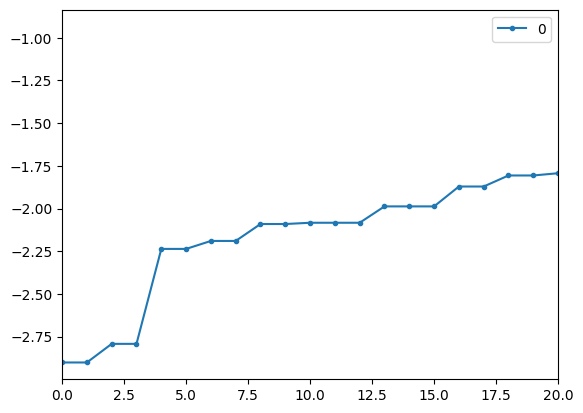

In [ ]:
# elbow method
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show()

In [ ]:
th = np.sort(df_scores)[3]  # set any lower scores than that as outlier
df[df_scores < th] # check outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
228,4,197.000,70.000,39.000,744.000,36.700,2.329,31.000,0
1386,4,197.000,70.000,39.000,744.000,36.700,2.329,31.000,0


In [ ]:
df.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
Pregnancies,2000.000,3.704,3.306,0.000,0.000,0.000,1.000,3.000,6.000,9.000,13.000,17.000
Glucose,2000.000,121.868,30.588,44.000,67.990,80.000,99.000,117.000,141.000,168.000,195.000,199.000
BloodPressure,2000.000,72.320,12.133,24.000,44.000,53.140,64.000,72.000,80.000,88.000,106.000,122.000
SkinThickness,2000.000,29.244,9.125,7.000,10.000,14.000,25.000,29.000,32.000,40.000,52.000,110.000
Insulin,2000.000,140.482,81.563,14.000,23.000,50.000,120.000,126.000,130.000,210.000,495.000,744.000
BMI,2000.000,32.666,7.207,18.200,19.500,22.200,27.600,32.400,36.800,42.110,52.900,80.600
DiabetesPedigreeFunction,2000.000,0.471,0.324,0.078,0.096,0.141,0.244,0.376,0.624,0.878,1.601,2.420
Age,2000.000,33.090,11.786,21.000,21.000,21.000,24.000,29.000,40.000,50.000,67.000,81.000
Outcome,2000.000,0.342,0.474,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


In [ ]:
print("Before delete outliers:", df.shape)
print(df[df_scores < th].index) # indexes of outliers, just for observation
df.drop(axis=0, labels=df[df_scores < th].index, inplace=True)
print("After delete outliers:", df.shape)

Before delete outliers: (2000, 9)
Index([228, 1386], dtype='int64')
After delete outliers: (1998, 9)


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

<ipython-input-66-f92e16e0483f>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [ ]:
# after re-assignment
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1998.000,3.695,3.279,0.000,1.000,3.000,6.000,13.500
Glucose,1998.000,121.792,30.511,44.000,99.000,117.000,141.000,199.000
BloodPressure,1998.000,72.275,11.778,40.000,64.000,72.000,80.000,104.000
SkinThickness,1998.000,28.923,7.484,14.500,25.000,29.000,32.000,42.500
Insulin,1998.000,125.546,13.505,105.000,120.000,126.000,130.000,145.000
BMI,1998.000,32.551,6.799,18.200,27.600,32.400,36.800,50.600
DiabetesPedigreeFunction,1998.000,0.459,0.283,0.078,0.244,0.376,0.623,1.192
Age,1998.000,32.994,11.497,21.000,24.000,29.000,40.000,64.000
Outcome,1998.000,0.342,0.475,0.000,0.000,0.000,1.000,1.000


In [ ]:
# pregrancy cannot be float, it occurs due to calculation of IQR
df["Pregnancies"] = df["Pregnancies"].apply(lambda x: int(x))

. Feature Extraction¶
When a data set is prepared, not only existing variables are tried to be edited, but also new, meaningful variables have to be created. New columns sometimes can be created with mathematical operations, sometimes named a numerical value to categorical, or categorical values' ranges, etc. This process is known as Feature Engineering, and this is one of the critical parts of data preparation.

In [ ]:
# create categorical columns from numerical columns

# if bins are 0, 3, 6 => 0 values become NaN due to bins
df["NumOfPreg"] = pd.cut(df["Pregnancies"], bins=[-1, 3, 6, df["Pregnancies"].max()], labels=["Normal", "Above Normal","Extreme"])
df["AgeGroup"] = pd.cut(df["Age"], bins=[18, 25, 40, df["Age"].max()], labels=["Young", "Mature", "Old"])
df["GlucoseGroup"] = pd.qcut(df["Glucose"], 3, labels=["Low", "Medium", "High"])
df["Patient"] = np.where(df["Outcome"] == 1, "Yes", "No")

In [ ]:
# example of mathematical expression

"""Assume there is a variable named "BMIns", and it can be found with the multiplication of BMI and Insuline.
Create and add it to data frame"""

df["BMIns"] = df["BMI"]*df["Insulin"] # numerical
df["BMInsGroup"] = pd.qcut(df["BMIns"], 3, labels=["Low", "Medium", "High"]) # categorical

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NumOfPreg,AgeGroup,GlucoseGroup,Patient,BMIns,BMInsGroup
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1,Normal,Old,High,Yes,4233.600,Medium
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0,Normal,Young,Low,No,4775.000,High
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1,Normal,Mature,High,Yes,5569.200,High
3,0,135.000,68.000,42.000,145.000,42.300,0.365,24.000,1,Normal,Young,High,Yes,6133.500,High
4,1,139.000,62.000,41.000,145.000,40.700,0.536,21.000,0,Normal,Young,High,No,5901.500,High


Encoding & Scaling

In [ ]:
df_enc = df.copy()

le = LabelEncoder()
le.fit_transform(df_enc["Patient"])[0:5]

array([1, 0, 1, 1, 0])

In [ ]:
# let's say we forgot which 0 and which 1, inverse_transform is used to detect this
le.inverse_transform([0, 1])

array(['No', 'Yes'], dtype=object)

In [ ]:
# detect variables that have 2 unique numbers for Binary Encoding
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
binary_cols

['Patient']

If a variable is converted like this to numeric values and sent to algorithms, the algorithm defines this variable as a variable ranging from an interval. In other words, this transformation will confuse the algorithms. The reason for its corruption is here, the categorical variable has turned into numerical values, and a categorical variable, which is normally a nominal scale type, is suddenly distorted by a transformation process and is subjected to a sorting process as if there is a difference between them. The characteristic of the nominal scale type is that the distance between classes is equal, but this equality is disturbed after this transformation.

This situation can cause biases and problems when we convert categorical variables to numeric values and confuse algorithms. In this case, we need to do one-hot encoding.

To fix this problem, one-hot conversion is done, but doing this also creates a trap named as "dummy variable trap."

If we apply a transformation to the variables in the data set, if the new variables can be created over each other, this is a dummy variable trap. In other words, if there is a variable that represents another variable, this situation is called a dummy variable trap.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NumOfPreg,AgeGroup,GlucoseGroup,Patient,BMIns,BMInsGroup
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1,Normal,Old,High,Yes,4233.600,Medium
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0,Normal,Young,Low,No,4775.000,High
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1,Normal,Mature,High,Yes,5569.200,High
3,0,135.000,68.000,42.000,145.000,42.300,0.365,24.000,1,Normal,Young,High,Yes,6133.500,High
4,1,139.000,62.000,41.000,145.000,40.700,0.536,21.000,0,Normal,Young,High,No,5901.500,High


In [ ]:
df_new = pd.get_dummies(df, columns=["Patient"])
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NumOfPreg,AgeGroup,GlucoseGroup,BMIns,BMInsGroup,Patient_No,Patient_Yes
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1,Normal,Old,High,4233.600,Medium,False,True
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0,Normal,Young,Low,4775.000,High,True,False
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1,Normal,Mature,High,5569.200,High,False,True
3,0,135.000,68.000,42.000,145.000,42.300,0.365,24.000,1,Normal,Young,High,6133.500,High,False,True
4,1,139.000,62.000,41.000,145.000,40.700,0.536,21.000,0,Normal,Young,High,5901.500,High,True,False


In [ ]:
df_new = pd.get_dummies(df, columns=["Patient"], drop_first=True, prefix=["Sick"])
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NumOfPreg,AgeGroup,GlucoseGroup,BMIns,BMInsGroup,Sick_Yes
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1,Normal,Old,High,4233.600,Medium,True
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0,Normal,Young,Low,4775.000,High,False
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1,Normal,Mature,High,5569.200,High,True
3,0,135.000,68.000,42.000,145.000,42.300,0.365,24.000,1,Normal,Young,High,6133.500,High,True
4,1,139.000,62.000,41.000,145.000,40.700,0.536,21.000,0,Normal,Young,High,5901.500,High,False


In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 1998
Variables: 15
cat_cols: 6
num_cols: 9
cat_but_car: 0
num_but_cat: 5


['Patient', 'Outcome', 'NumOfPreg', 'AgeGroup', 'GlucoseGroup', 'BMInsGroup']

In [ ]:
cat_cols_final = [i for i in cat_cols if i not in ["Patient", "Outcome"]]
df = pd.get_dummies(df, columns=cat_cols_final, drop_first=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1,Yes,4233.600,False,False,False,True,False,True,True,False
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0,No,4775.000,False,False,False,False,False,False,False,True
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1,Yes,5569.200,False,False,True,False,False,True,False,True
3,0,135.000,68.000,42.000,145.000,42.300,0.365,24.000,1,Yes,6133.500,False,False,False,False,False,True,False,True
4,1,139.000,62.000,41.000,145.000,40.700,0.536,21.000,0,No,5901.500,False,False,False,False,False,True,False,True


Scaling¶
It is a variable scaling operation. The aim is to eliminate the measurement difference between the variables and to try to ensure that the models to be used approach the variables under equal conditions. Tree-based methods are not affected by outlier, standardization. In the general trend, we may prefer to scale features.

The variance structure and information structure within the variable itself are not deteriorated, but are set to a certain standard. For example, let's say a dataset has a value of 10 and is ranked 80th when ordered from smallest to largest. When this variable is standardized, the value of 10 will be something like between 1-2 or 0 to 1, but when the data set is again ordered from smallest to largest, this value will still correspond to the 80th value. Therefore, when a variable is standardized, the value of the variable will change, it will be put into a certain format, but the spread and the essence of the distribution information will not change. The values of the variable such as mean, standard deviation and variance will change,as well, but the spread, distribution and current state of the information it carries within the variable will not change.

Scaling¶
It is a variable scaling operation. The aim is to eliminate the measurement difference between the variables and to try to ensure that the models to be used approach the variables under equal conditions. Tree-based methods are not affected by outlier, standardization. In the general trend, we may prefer to scale features.

The variance structure and information structure within the variable itself are not deteriorated, but are set to a certain standard. For example, let's say a dataset has a value of 10 and is ranked 80th when ordered from smallest to largest. When this variable is standardized, the value of 10 will be something like between 1-2 or 0 to 1, but when the data set is again ordered from smallest to largest, this value will still correspond to the 80th value. Therefore, when a variable is standardized, the value of the variable will change, it will be put into a certain format, but the spread and the essence of the distribution information will not change. The values of the variable such as mean, standard deviation and variance will change,as well, but the spread, distribution and current state of the information it carries within the variable will not change.

In [ ]:
df_scale = df.copy()

# standart scaler
ss = StandardScaler()
df_scale["Age_standard_scaler"] = ss.fit_transform(df_scale[["Age"]])
df_scale.head()

# robust scaler
rs = RobustScaler()
df_scale["Age_robuts_scaler"] = rs.fit_transform(df_scale[["Age"]])

# min-max scaler
# The range can be given with the feature_range=() argument
mms = MinMaxScaler() # default range from 0 to 1
df_scale["Age_min_max_scaler"] = mms.fit_transform(df_scale[["Age"]])

df_scale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High,Age_standard_scaler,Age_robuts_scaler,Age_min_max_scaler
0,2,138.000,62.000,35.000,126.000,33.600,0.127,47.000,1,Yes,4233.600,False,False,False,True,False,True,True,False,1.218,1.125,0.605
1,0,84.000,82.000,31.000,125.000,38.200,0.233,23.000,0,No,4775.000,False,False,False,False,False,False,False,True,-0.869,-0.375,0.047
2,0,145.000,82.600,29.000,126.000,44.200,0.630,31.000,1,Yes,5569.200,False,False,True,False,False,True,False,True,-0.173,0.125,0.233
3,0,135.000,68.000,42.000,145.000,42.300,0.365,24.000,1,Yes,6133.500,False,False,False,False,False,True,False,True,-0.782,-0.312,0.070
4,1,139.000,62.000,41.000,145.000,40.700,0.536,21.000,0,No,5901.500,False,False,False,False,False,True,False,True,-1.043,-0.500,0.000


In [ ]:
 # Assuming your cleaned DataFrame is named `df_cleaned`
df_scale.to_csv('cleaned_diabetes_data.csv', index=False)


In [ ]:
rs = RobustScaler()
for i in num_cols:
      df[i] = rs.fit_transform(df[[i]])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Patient,BMIns,NumOfPreg_Above Normal,NumOfPreg_Extreme,AgeGroup_Mature,AgeGroup_Old,GlucoseGroup_Medium,GlucoseGroup_High,BMInsGroup_Medium,BMInsGroup_High
0,-0.200,0.500,-0.625,0.857,0.000,0.130,-0.656,1.125,1,Yes,0.155,False,False,False,True,False,True,True,False
1,-0.600,-0.786,0.625,0.286,-0.100,0.630,-0.376,-0.375,0,No,0.514,False,False,False,False,False,False,False,True
2,-0.600,0.667,0.662,0.000,0.000,1.283,0.672,0.125,1,Yes,1.041,False,False,True,False,False,True,False,True
3,-0.600,0.429,-0.250,1.857,1.900,1.076,-0.028,-0.312,1,Yes,1.415,False,False,False,False,False,True,False,True
4,-0.400,0.524,-0.625,1.714,1.900,0.902,0.423,-0.500,0,No,1.261,False,False,False,False,False,True,False,True


In [ ]:
from google.colab import files
files.download('cleaned_diabetes_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop columns that are not needed
columns_to_drop = ['Patient']
df_model = df.drop(columns=columns_to_drop)

# Keep only the first 8 features + target
# Get feature column names (excluding 'Outcome')
feature_columns = df_model.drop(columns=['Outcome']).columns[:8]
df_model = df_model[feature_columns.tolist() + ['Outcome']]

# Define features and target
X = df_model.drop(columns=['Outcome'])
y = df_model['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()

}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results[name] = {
        "train_accuracy": accuracy_score(y_train, y_pred_train),
        "test_accuracy": accuracy_score(y_test, y_pred_test),
        "classification_report": classification_report(y_test, y_pred_test, output_dict=True),
        "model": model
    }

results


{'Logistic Regression': {'train_accuracy': 0.7703379224030038,
  'test_accuracy': 0.76,
  'classification_report': {'0': {'precision': 0.7979094076655052,
    'recall': 0.8576779026217228,
    'f1-score': 0.8267148014440433,
    'support': 267.0},
   '1': {'precision': 0.6637168141592921,
    'recall': 0.5639097744360902,
    'f1-score': 0.6097560975609756,
    'support': 133.0},
   'accuracy': 0.76,
   'macro avg': {'precision': 0.7308131109123986,
    'recall': 0.7107938385289065,
    'f1-score': 0.7182354495025094,
    'support': 400.0},
   'weighted avg': {'precision': 0.7532903703246894,
    'recall': 0.76,
    'f1-score': 0.7545760324029233,
    'support': 400.0}},
  'model': LogisticRegression(max_iter=1000)},
 'Random Forest': {'train_accuracy': 1.0,
  'test_accuracy': 0.98,
  'classification_report': {'0': {'precision': 0.9850187265917603,
    'recall': 0.9850187265917603,
    'f1-score': 0.9850187265917603,
    'support': 267.0},
   '1': {'precision': 0.9699248120300752,
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # Train the model before using it



RandomForestClassifier()

In [ ]:
def predict_diabetes_rf(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    prediction = rf_model.predict(input_array)[0]
    probability = rf_model.predict_proba(input_array)[0][1]
    return int(prediction), float(probability)


In [ ]:
predict_diabetes_rf([4,129,86,20,145,35.1,0.231,23])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(1, 0.71)

In [ ]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
from IPython.display import display, HTML

# Sample input (replace this with your actual input)
sample_input = [1	,81,	72	,18	,105	,26.6,	0.283,	24]  # 8 features

# Define the feature names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create DataFrame for prediction
X_input = pd.DataFrame([sample_input], columns=feature_names)

# Make prediction
prediction = rf_model.predict(X_input)[0]
probability = rf_model.predict_proba(X_input)[0][1]

# Build record to log
record = sample_input + [int(prediction), float(probability), datetime.now().strftime("%Y-%m-%d %H:%M:%S")]
columns = feature_names + ['Prediction', 'Probability', 'Timestamp']
df_record = pd.DataFrame([record], columns=columns)

# File path to save log
csv_path = "/content/diabetes_predictions_logfile.csv"

# Display prediction
if prediction == 0:
    print("🟢 The person is **not diabetic**")
else:
    print("🔴 The person is **diabetic**")

# Append or create the CSV file
if os.path.exists(csv_path):
    df_existing = pd.read_csv(csv_path)

    # Convert to same types to ensure correct comparison
    for col in feature_names:
        df_existing[col] = pd.to_numeric(df_existing[col], errors='coerce')

    duplicate = ((df_existing[feature_names] == X_input.iloc[0]).all(axis=1)).any()
else:
    duplicate = False

if duplicate:
    print("⚠️ Same input already exists in log — not appending again.")
else:
    if not os.path.exists(csv_path):
        df_record.to_csv(csv_path, index=False)
    else:
        df_record.to_csv(csv_path, mode='a', header=False, index=False)
    print("📄 Entry saved to:", csv_path)

# Display the last 10 records in the log
df_log = pd.read_csv(csv_path)
display(HTML("<h4>📋 Full Prediction Log</h4>"))
display(df_log.tail(10))


🔴 The person is **diabetic**
📄 Entry saved to: /content/diabetes_predictions_logfile.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Prediction,Probability,Timestamp
0,1,81,72,18,105,26.600,0.283,24,1,0.710,2025-04-28 05:56:39
